In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [3]:
filename = "/Users/arnavprasad/Google Drive/Documents/Coding/Cricket/deliveries.csv"

cols = ["match_id", "inning", "over", "ball", "total_runs"]

df = pd.read_csv(filename, usecols=cols)

df.rename(columns={"total_runs": "runs"}, inplace=True)

In [4]:
df.head()

,match_id,inning,over,ball,runs
0,1,1,1,1,0
1,1,1,1,2,0
2,1,1,1,3,4
3,1,1,1,4,0
4,1,1,1,5,2


In [6]:
pd.set_option('mode.chained_assignment', None)

data = {}

#sort data by matches/innings in a dictionary
for i, row in df.iterrows():
    
    match_id = row["match_id"]
    inning = row["inning"]

    data[f"{match_id}, {inning}"] = {"scorecard": df[(df["match_id"] == match_id) & (df["inning"] == inning)]}


#get the total/halfway scores
for inning in data.copy().keys():
    sc = data[inning]["scorecard"]

    balls = len(sc)
    data[inning]["balls"] = balls


    sc["total_runs"] = sc["runs"].cumsum()


    final_score = sc["total_runs"].iloc[-1]
    data[inning]["final_score"] = final_score

    halfway = sc[sc["total_runs"] >= int(final_score/2)].iloc[0]


    #halfway point of the total score
    data[inning]["halfway point"] = halfway["over"] + halfway["ball"]/6

    del data[inning]["scorecard"]



    #delete innings with fewer than 20 overs
    if balls < 120:
        del data[inning]

    


In [11]:
totals = []
halfway_pts = []

for inning in data.keys():
    halfway_pts.append(data[inning]["halfway point"])
    totals.append(data[inning]["final_score"])

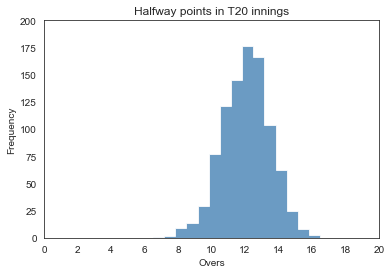

In [23]:
plt.figure()
plt.xlim(0, 20)
plt.ylim(0, 200)
plt.xticks(range(0, 21, 2))
plt.hist(np.array(halfway_pts), histtype="stepfilled", color="steelblue", bins=15, alpha=0.8)
plt.xlabel("Overs")
plt.ylabel("Frequency")
plt.title("Halfway points in T20 innings")

#plt.savefig("/Users/arnavprasad/Google Drive/Documents/Coding/Cricket/halfway_pts.jpg", dpi=600)